In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
plt.rcParams.update({'font.size':16,'figure.figsize':(10,8)})

### Q) How do you upload files from Github to Azure Notebooks?

### A) Initially: https://notebooks.azure.com/help/libraries/creating/import-from-github
### Subsequently: 
   - Open terminal in Azure notebook library
   - cd library
### From GitHub to Azure:
   - git pull
### From Azure to GitHub:
   - git add your_file_names
   - git commit "your git commit message"
   - git push

### Q) How do you overlay several iterations of a dataset?

### A) Each time you call `plt.plot`, it will add data to the same plot.  
#### If you want the data on a new plot, call `plt.figure`.  

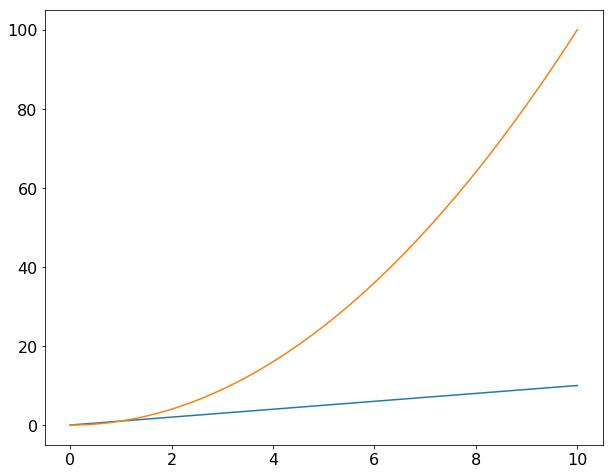

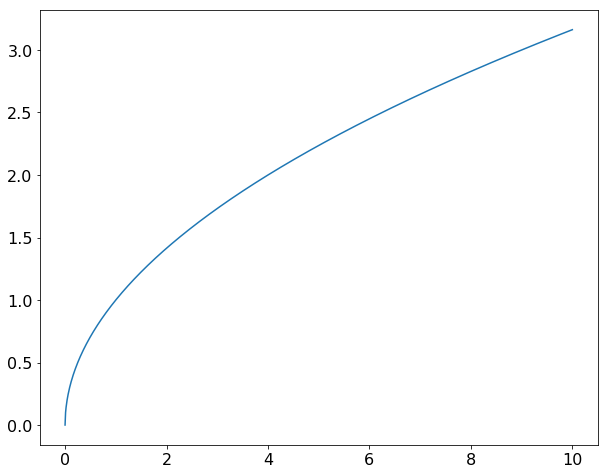

In [3]:
x = np.linspace(0,10,1000)
y1 = x
y2 = x**2
y3 = x**(1/2)
plt.plot(x,y1)
plt.plot(x,y2)
plt.figure()
plt.plot(x,y3);

### Q) How do you get large datasets and load them into a software analysis package? 

### A) Where to get large datasets depends on your research topic.  
#### Whatever file format you download, use Pandas (e.g. pd.read_csv, pd.read_excel) or another library to load that data.  
#### LMGTFY

### Q) What exactly does an ROC graph demonstrate?

### A) Quality of classification 
#### Sensitivity (what fraction of sick people get the "sick" diagnosis) vs specificity (what fraction of people that get the "sick" diagnosis are sick?)

### Q) What are some applications of PCA in neuroscience?

### A) Most commonly: visualizing clustered data or visualizing trajectories through high-dimensional state spaces

![pca-odors](images/pca-odors.png)

### Q) Can you tell me more about maximum likelihood estimation and clustering analysis.

### A) Yes.

### Q) How do you filter data that is sparse, contains special characters, and contains a mix of categorical and numeric data?
https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data 

### A) Like a boss

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3


#### Identify the characters that represent null values and load the data accordingly

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data',header=None,na_values='?')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,NaN,C,A,8,0,NaN,S,NaN,0,NaN,...,NaN,NaN,COIL,0.700,610.0,0,NaN,0,NaN,3
1,NaN,C,R,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,COIL,3.200,610.0,0,NaN,0,NaN,3
2,NaN,C,R,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,SHEET,0.700,1300.0,762,NaN,0,NaN,3
3,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,COIL,2.801,385.1,0,NaN,0,NaN,3
4,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,SHEET,0.801,255.0,269,NaN,0,NaN,3


#### Check the column types (and change if necessary)

In [6]:
df.dtypes.head()

0    object
1    object
2    object
3     int64
4     int64
dtype: object

In [7]:
df.dtypes[3] = 'object' # For example

#### Apply the one-hot encoding to turn the categorical data into numeric data

In [8]:
df = pd.get_dummies(df)
df.head()

,3,4,7,8,12,18,22,25,28,29,...,27_Y,31_COIL,31_SHEET,35_N,35_Y,38_1,38_2,38_3,38_5,38_U
0,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,1,0,0
1,0,0,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,0,0,0,0,0,1,0,0
2,0,0,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0
3,0,60,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,1,0,0
4,0,60,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0


#### Impute missing values, drop bad columns and rows, etc.  

### Q) How do you visualize networks that result from weighted correlation network analysis (WGCNA). 
https://github.com/SamBuckberry/RUN-WGCNA/tree/master/plots

### A) WGCNA is just a combination of the techniques we have covered in class: correlation matrices, dendrograms, clustering, identifying principal components, etc.  

### Q) How can we pick out the errors in a large data set and remove them efficiently?

### A) What is an error?  
- Use `.replace('bad','good')` to replace specific values with correct values
- Use `.fillna(0) ` to replace missing values with a fixed replacement value (e.g. 0)
- Use imputation to replace missing values with more likely values
- Use `.drop` to get rid of bad rows or columns

### Q) Is there a way to determine which visualization methods will be the most effective, given a large data set?

### A) Ask yourself about possible data patterns before possible visualization techniques.  
#### Visualization choices flow from patterns in the data and from the kinds of questions that you want to ask

### Q) Here is a website I was looking at that gives an example for the topics of data cleaning and loading: https://mdl.library.utoronto.ca/technology/tutorials/cleaning-data-python

### A) Thank you!

### Q) To analyze data with a range and a mean value, is it appropriate to utilize a pygal visualization library as a box plot, or is there easier/better way to visualize such data? 

### A) You can just use matplotlib (what we have been using all along), e.g.:

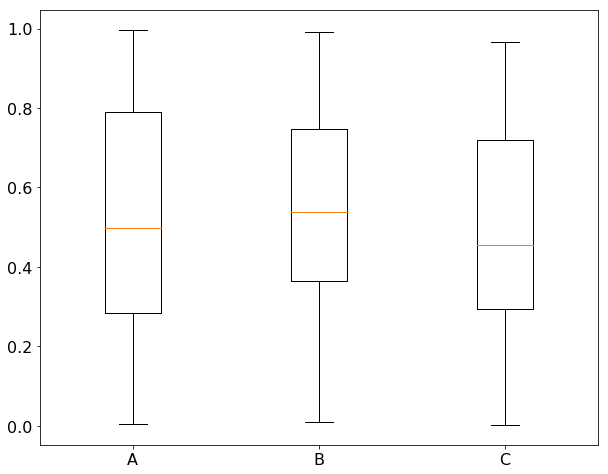

In [9]:
# When you have all the data points
data = np.random.rand(100,3)
plt.boxplot(data,labels=['A','B','C']);

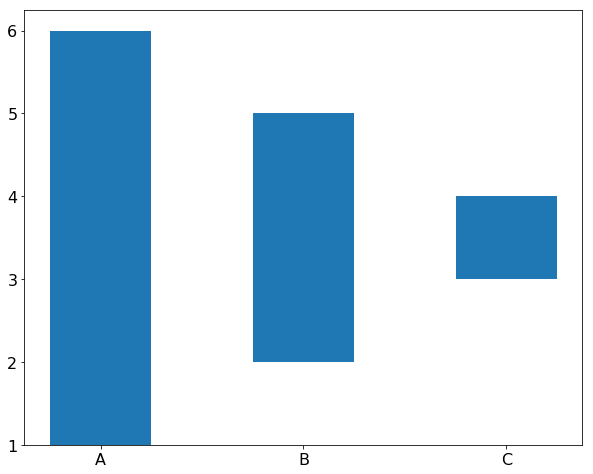

In [10]:
# When you only have a range
x = ['A','B','C']
bottom = np.array([1,2,3])
top = np.array([6,5,4])
height = top - bottom
plt.bar(x, height, 0.5, bottom);

### Q) How do we initialize a geoplotlib library for coding?

### A) 
#### `!pip install geoplotlib`
#### `import geoplotlib`

### Q) What's the first thing you do when you upload a dataset to assess it's quality. 
#### There is a package in R that helps visualize missing data values. Is there a similar package in python?

### A) http://www.residentmar.io/2016/03/28/missingno.html

In [11]:
df = pd.DataFrame(np.random.rand(100,3),columns=['A','B','C'])
df.loc[4:25,'A'] = None
df.loc[46:49,'C'] = None

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
A    78 non-null float64
B    100 non-null float64
C    96 non-null float64
dtypes: float64(3)
memory usage: 2.4 KB


In [13]:
df.isnull().sum()

A    22
B     0
C     4
dtype: int64

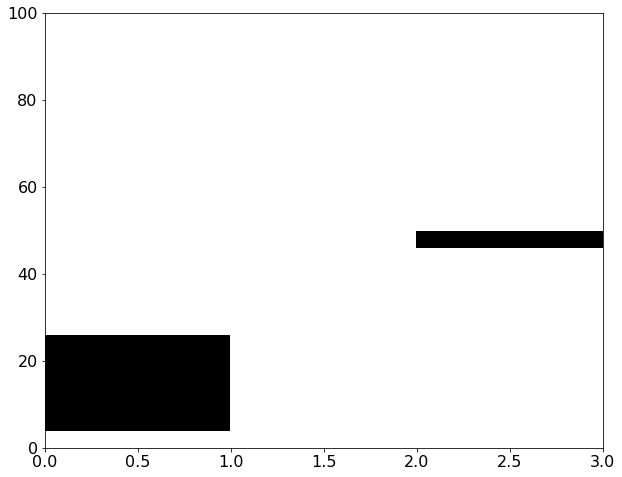

In [14]:
plt.pcolor(df.isnull(),cmap='Greys');

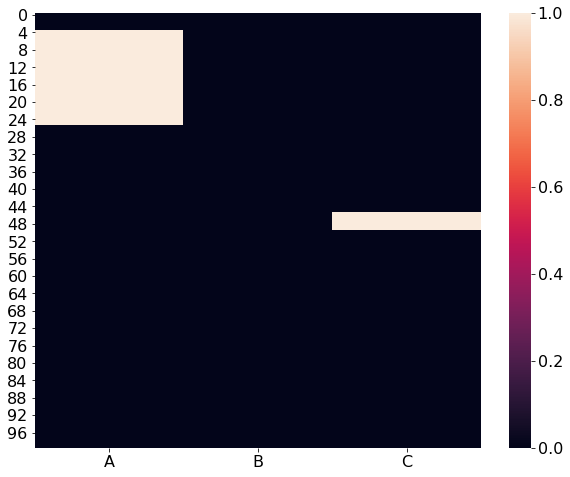

In [15]:
import seaborn as sns
sns.heatmap(df.isnull()*1)

### Q) I'd love to see a visualization you've done that you're most proud of. Or most embarrassed by. Either way.

![odor-prediction](images/odor-prediction.png)

### Q) Are there packaged "themes" like with colors, shapes (or line weights) to make your plots prettier?

### A) Seaborn

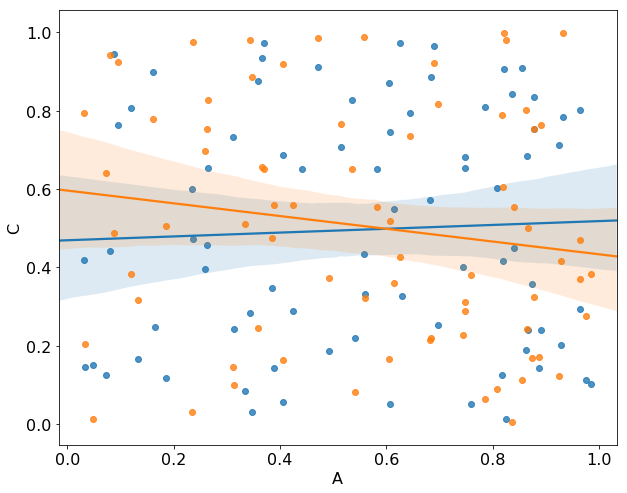

In [16]:
import seaborn as sns
sns.regplot(df['A'],df['B']);
sns.regplot(df['A'],df['C']);

#### Or play around with settings as in: http://jonchar.net/notebooks/matplotlib-styling/

#### Or change `plt.rcParams`

In [17]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use

### Q) How do you convert a dataset found online into a csv in order to upload it?

### A) If you can download it:
#### - If it is a text file (e.g. csv), use `pd.read_csv` with the correct delimiter.  
#### - If it is an excel file, use `pd.read_excel`.  
#### - If it is some other format, google the correct module for loading it.  

### If you can't download it:
#### - If you can copy and paste it, paste it into e.g. Excel and save it, then see above.  
#### - If you can't copy it, you may need a web scraping tool e.g. `BeautifulSoup`.  

### Q) What are some of the best ways to visualize data from PCA?

### A) Make a scatter plot of the data using the new dimensions as axes (2 or 3 of them), then cluster the data

In [18]:
y = np.random.rand(100,5)
y[50:,:] += 2
y[:,2] = y[:,0] + y[:,1]
y[:,3] = y[:,0] - y[:,1]
y[:,4] = y[:,0] + 2*y[:,1]

pca = PCA(n_components=2)
y_new = pca.fit_transform(y)
y_new.shape

(100, 2)

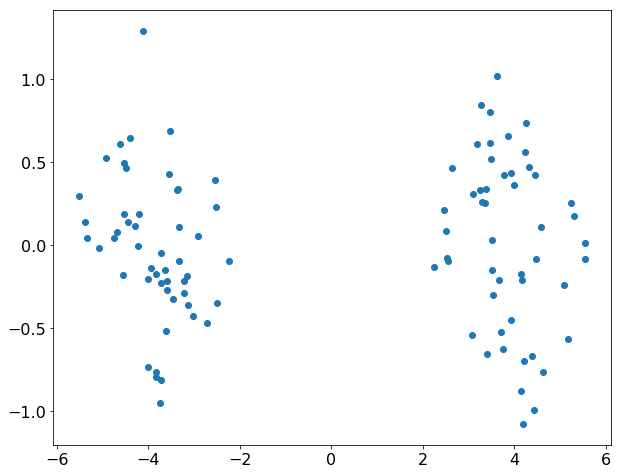

In [19]:
plt.scatter(y_new[:,0],y_new[:,1])

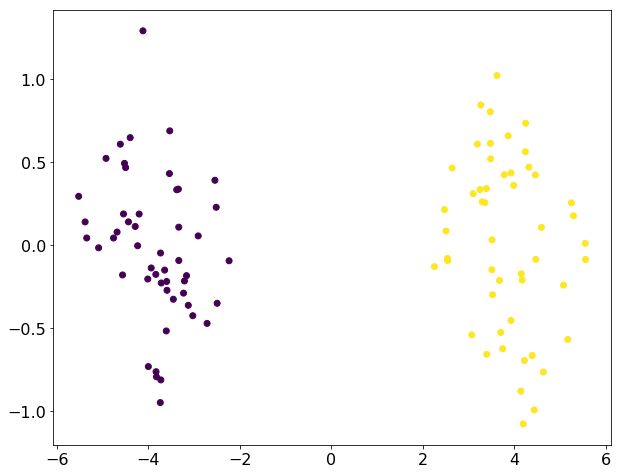

In [20]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(y);
plt.scatter(y_new[:,0],y_new[:,1],c=kmeans.labels_);

### Q) What are some basic data mining steps? 

### A) 
- Find a data set
- Download it
- Clean it
- Explore it with visualizations
- Perform analyses (using statistical methods)
- Make more visualizations
- Draw conclusions

### Q) How do you make heatmaps?

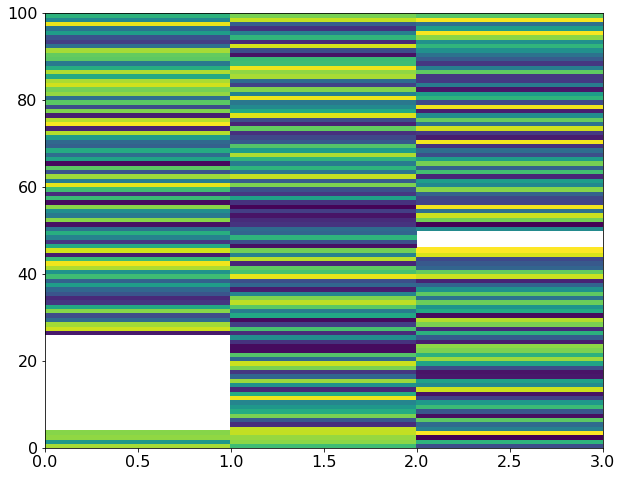

In [21]:
plt.pcolor(df);

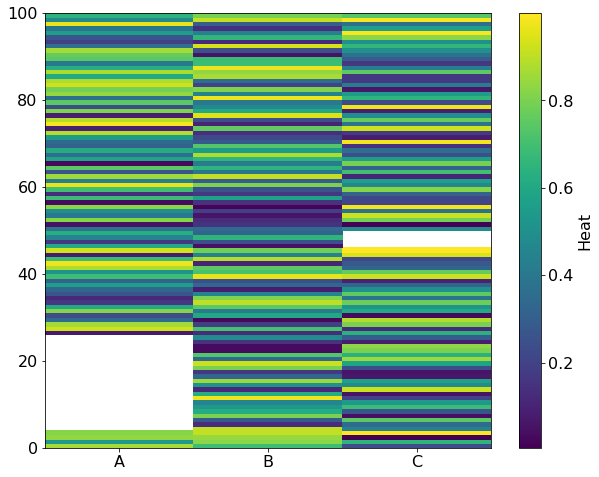

In [22]:
plt.pcolor(df);
plt.xticks(np.arange(0.5,3.4),['A','B','C']);
plt.colorbar().set_label('Heat')

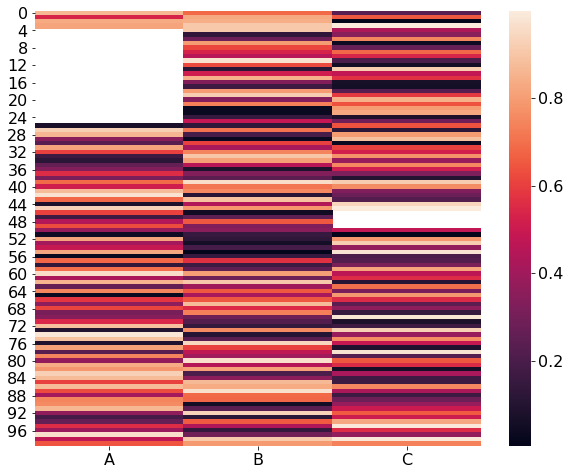

In [23]:
sns.heatmap(df);

### Q) How do you turn this kind of data: 

In [24]:
df = pd.DataFrame(np.random.rand(8,3),columns=['X','Y','Z'],index=[[1,1,2,2,3,3,4,4],['L','R']*4])
df

X         Y         Z
1 L  0.948668  0.406197  0.922192
  R  0.336030  0.276951  0.099895
2 L  0.266907  0.455871  0.473796
  R  0.865951  0.760074  0.566933
3 L  0.123089  0.439239  0.267467
  R  0.172771  0.278558  0.537499
4 L  0.805766  0.891226  0.354638
  R  0.298215  0.463784  0.723747

### Into this kind of data?

In [25]:
df.swaplevel()

,,X,Y,Z
L,1,0.948668,0.406197,0.922192
R,1,0.336030,0.276951,0.099895
L,2,0.266907,0.455871,0.473796
R,2,0.865951,0.760074,0.566933
L,3,0.123089,0.439239,0.267467
R,3,0.172771,0.278558,0.537499
L,4,0.805766,0.891226,0.354638
R,4,0.298215,0.463784,0.723747


### Or into this kind of data?

In [26]:
df.swaplevel().unstack()

X                                       Y                      \
          1         2         3         4         1         2         3   
L  0.948668  0.266907  0.123089  0.805766  0.406197  0.455871  0.439239   
R  0.336030  0.865951  0.172771  0.298215  0.276951  0.760074  0.278558   

                    Z                                
          4         1         2         3         4  
L  0.891226  0.922192  0.473796  0.267467  0.354638  
R  0.463784  0.099895  0.566933  0.537499  0.723747

### Or even into this kind of data?

In [27]:
df.unstack().swaplevel(axis=1)

,L,R,L,R,L,R
,X,X,Y,Y,Z,Z
1,0.948668,0.336030,0.406197,0.276951,0.922192,0.099895
2,0.266907,0.865951,0.455871,0.760074,0.473796,0.566933
3,0.123089,0.172771,0.439239,0.278558,0.267467,0.537499
4,0.805766,0.298215,0.891226,0.463784,0.354638,0.723747


### Or (if one may be so bold) into this kind of data?

In [28]:
df.unstack().swaplevel(axis=1).sort_index(axis=1)

L                             R                    
          X         Y         Z         X         Y         Z
1  0.948668  0.406197  0.922192  0.336030  0.276951  0.099895
2  0.266907  0.455871  0.473796  0.865951  0.760074  0.566933
3  0.123089  0.439239  0.267467  0.172771  0.278558  0.537499
4  0.805766  0.891226  0.354638  0.298215  0.463784  0.723747

### Q) How exactly could you plot these coordinates so that different colours represent different labels?

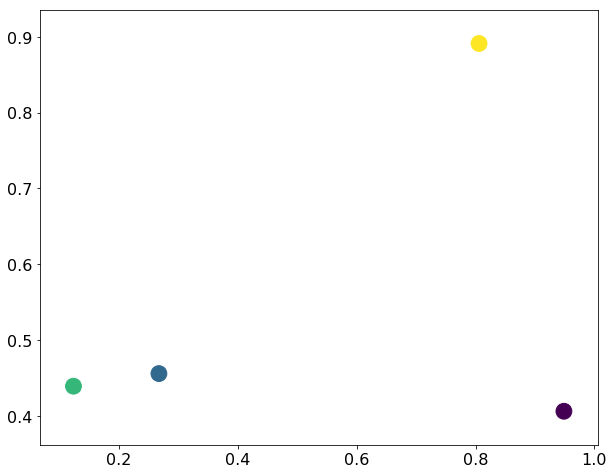

In [29]:
df_new = df.unstack().swaplevel(axis=1).sort_index(axis=1)
plt.scatter(df_new['L']['X'],df_new['L']['Y'],s=250,c=df_new.index);

### Q) How do you load raw byte data into python? 

### Q) I would like to try use the MRI's in this database for the final project. 
- http://brainweb.bic.mni.mcgill.ca/brainweb/anatomic_normal_20.html
- http://nipy.org/nibabel/reference/nibabel.minc2.html

### Q) How do you manually rotate a three-dimensional scatter plot?

### Q) How do you make heat maps from different types of data sets. 

### Q) How do you take certain columns and rows out of a data set. 

### Q) How do I do imputation if some of my data is in float format and some is in string format, without removing the string data? 

### Q) How do you pull only some of the information out of a cell, especially if it is a string?

### Q) How do you basic formatting on a graph (changing colors, sizes of things, fonts, etc.)

### Q) How do you find data across studies that share multiple variables to compare.  

### Q) How do you decide which visualizations to do for a particular data set?  

### Q) Given two dataframes where the rows are names; how can you make a new dataframe with the names only common to both dataframes

### Q) How can you visualize the brain so that each region has a different color, corresponding to a value for that brain region?  

### Q) Is there an Excel/Python cheat sheet?

### Q) How do you visualize the results of many t-tests?